# IBM Data Science Capstone Project

**The project focuses on the neighbourhoods and boroughs in New York City and aims to solve the problem of selecting an appropriate neighbourhood for opening a Chinese restaurant.**

I've utilized word clouds on the cuisine data of NYC obtained from wikipedia to understand the spread of cuisines. I utilized the results of the word cloud to select a location in NYC and implemented K-means clustering in that region.  

In [83]:
#Importing the required libraries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Libraries imported.
Matplotlib version:  3.0.2


In [84]:
#Importing the word cloud library

from wordcloud import WordCloud, STOPWORDS

## Exploring the cuisine dataset

In [85]:
cuisine=pd.read_csv('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\data\\Restaurant_Grades.csv')

In [86]:
cuisine.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE
0,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Pesticide use not in accordance with label or ...,N,6,A,06/11/2019,08/13/2019
1,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Plumbing not properly installed or maintained;...,N,6,A,06/11/2019,08/13/2019
2,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Non-food contact surface improperly constructe...,N,6,A,06/11/2019,08/13/2019
3,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Pesticide use not in accordance with label or ...,N,5,A,05/11/2018,08/13/2019
4,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Non-food contact surface improperly constructe...,N,5,A,05/11/2018,08/13/2019


In [87]:
bor_cuisine=cuisine[['BORO', 'CUISINE DESCRIPTION']]

In [88]:
type(bor_cuisine)

pandas.core.frame.DataFrame

In [89]:
bor_cuisine.head()

,BORO,CUISINE DESCRIPTION
0,Bronx,Bakery
1,Bronx,Bakery
2,Bronx,Bakery
3,Bronx,Bakery
4,Bronx,Bakery


In [90]:
bor_cuisine['BORO'].value_counts()

Manhattan        76389
Brooklyn         48689
Queens           44702
Bronx            18154
Staten Island     6675
0                   54
Name: BORO, dtype: int64

In [91]:
bor_cuisine['CUISINE DESCRIPTION'].value_counts()

American                                                            43124
Chinese                                                             19892
Café/Coffee/Tea                                                     10510
Pizza                                                                8712
Italian                                                              7787
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     7687
Mexican                                                              7540
Japanese                                                             6637
Bakery                                                               6199
Caribbean                                                            6180
Spanish                                                              5493
Pizza/Italian                                                        4081
Chicken                                                              3704
Donuts                                

#### Exploring cuisines in Manhattan

In [92]:
Man_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Manhattan']
Cuisine_M=Man_cuisine[['CUISINE DESCRIPTION']]
Cuisine_M.head()

,CUISINE DESCRIPTION
21,Irish
22,Irish
23,Irish
24,Irish
25,Irish


In [ ]:
Cuisine_M.to_csv('CUISINE_Manhattan.txt', sep=',', index=False)

In [93]:
Cuisine_M1 = open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\results\\CUISINE_Manhattan.txt', 'r').read()

In [94]:
stopwords = set(STOPWORDS)

In [95]:
NYC_CUISINE_Man = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_Man.generate(Cuisine_M1)

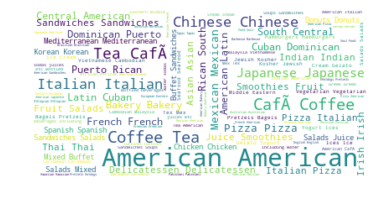

<Figure size 3240x3960 with 0 Axes>

In [96]:
plt.imshow(NYC_CUISINE_Man, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines in Brooklyn 

In [97]:
Brook_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Brooklyn']
Cuisine_B=Brook_cuisine[['CUISINE DESCRIPTION']]
Cuisine_B.head()

,CUISINE DESCRIPTION
7,Hamburgers
8,Hamburgers
9,Hamburgers
10,Hamburgers
11,Hamburgers


In [98]:
Cuisine_B.to_csv('CUISINE_Brooklyn.txt', sep=',', index=False)

In [99]:
Cuisine_B1 = open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\results\\CUISINE_Brooklyn.txt', 'r').read()

In [26]:
NYC_CUISINE_B = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_B.generate(Cuisine_B1)

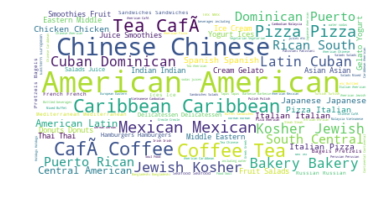

<Figure size 3240x3960 with 0 Axes>

In [100]:
plt.imshow(NYC_CUISINE_B, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines in Bronx

In [101]:
Bronx_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Bronx']
Cuisine_Br=Bronx_cuisine[['CUISINE DESCRIPTION']]
Cuisine_Br.head()

,CUISINE DESCRIPTION
0,Bakery
1,Bakery
2,Bakery
3,Bakery
4,Bakery


In [ ]:
Cuisine_Br.to_csv('CUISINE_Bronx.txt', sep=',', index=False)

In [102]:
Cuisine_Br1 = open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\results\\CUISINE_Bronx.txt', 'r').read()

NYC_CUISINE_Br = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_Br.generate(Cuisine_Br1)

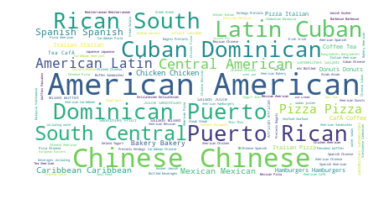

<Figure size 3240x3960 with 0 Axes>

In [103]:
plt.imshow(NYC_CUISINE_Br, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines on Staten Island

In [104]:
staten_island_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Staten Island']
Cuisine_stat=staten_island_cuisine[['CUISINE DESCRIPTION']]
Cuisine_stat.head()

,CUISINE DESCRIPTION
201,Delicatessen
202,Delicatessen
203,Delicatessen
204,Delicatessen
205,Delicatessen


In [32]:
Cuisine_stat.to_csv('CUISINE_StatenIsland.txt', sep=',', index=False)

In [105]:
Cuisine_stat1 = open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\results\\CUISINE_StatenIsland.txt', 'r').read()

NYC_CUISINE_stat = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_stat.generate(Cuisine_stat1)

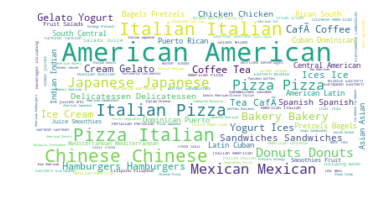

<Figure size 3240x3960 with 0 Axes>

In [106]:
plt.imshow(NYC_CUISINE_stat, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

**The above word clouds show that the most popular cuisine in New York in American. In case of Chinese cuisine, Bronx has more chinese restaurants than any other city in the NYC region. Thus, exploring Bronx makes sense.**


In [107]:
with open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\data\\newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [36]:
#newyork_data

In [108]:
neighborhoods_data = newyork_data['features']

In [38]:
#neighborhoods_data[0]

In [109]:
#Creating an empty dataframe for NYC
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiating the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [110]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [111]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [112]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [113]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [114]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [128]:
# creating map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# adding markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [116]:
CLIENT_ID = 'JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL' # your Foursquare ID
CLIENT_SECRET = 'GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL
CLIENT_SECRET:GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA


### Exploring Bronx borough for clustering 

In [117]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [118]:
dress = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.7127281, -74.0060152.


In [129]:
# creating map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

In [120]:
bronx_data.loc[0, 'Neighborhood']

'Wakefield'

In [121]:
neighborhood_latitude = bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [122]:
LIMIT=100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL&client_secret=GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [123]:
results = requests.get(url).json()
#results

In [124]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [125]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filtering columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtering the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# cleaning columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
2,Walgreens,Pharmacy,40.896528,-73.844700
3,Rite Aid,Pharmacy,40.896649,-73.844846
4,Dunkin',Donut Shop,40.890459,-73.849089


In [126]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


In [127]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # returning only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [130]:
bronx_venues=getNearbyVenues(names=bronx_data['Neighborhood'],
                                    latitudes=bronx_data['Latitude'],
                                    longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [131]:
print(bronx_venues.shape)
bronx_venues.head()

(1200, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [132]:
bronx_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,31,31,31,31,31,31
Baychester,20,20,20,20,20,20
Bedford Park,37,37,37,37,37,37
Belmont,98,98,98,98,98,98
Bronxdale,14,14,14,14,14,14
Castle Hill,7,7,7,7,7,7
City Island,28,28,28,28,28,28
Claremont Village,18,18,18,18,18,18
Clason Point,9,9,9,9,9,9


In [133]:
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 163 uniques categories.


In [134]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# moving neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Venue,Nightclub,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [135]:
bronx_onehot.shape

(1200, 164)

In [136]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Venue,Nightclub,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store
0,Allerton,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.0000,0.000000,0.00000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.032258,0.000000,0.000000,0.000000,0.00,0.000000,0.032258,0.0000,0.000000,0.064516,0.064516,0.032258,0.000000,0.032258,0.0000,0.000000,0.000000,0.032258,0.000000,0.032258,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.032258,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.032258,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.161290,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.032258,0.032258,0.000000,0.000000,0.000000,0.096774,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Baychester,0.050000,0.000000,0.050000,0.00,0.05,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [137]:
bronx_grouped.shape

(52, 164)

In [138]:
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
              venue  freq
0       Pizza Place  0.16
1       Supermarket  0.10
2     Deli / Bodega  0.06
3  Department Store  0.06
4    Discount Store  0.03


----Baychester----
               venue  freq
0         Donut Shop  0.10
1  Accessories Store  0.05
2        Supermarket  0.05
3        Pizza Place  0.05
4          Pet Store  0.05


----Bedford Park----
                venue  freq
0         Pizza Place  0.11
1               Diner  0.11
2  Chinese Restaurant  0.11
3         Supermarket  0.05
4      Sandwich Place  0.05


----Belmont----
                venue  freq
0  Italian Restaurant  0.19
1       Deli / Bodega  0.08
2         Pizza Place  0.08
3              Bakery  0.05
4       Grocery Store  0.03


----Bronxdale----
                   venue  freq
0         Breakfast Spot  0.07
1                   Bank  0.07
2  Performing Arts Venue  0.07
3                   Park  0.07
4        Doctor's Office  0.07


----Castle Hill----
           venue  freq
0    Pizza Place

4       Cosmetics Shop  0.05


----Van Nest----
           venue  freq
0    Pizza Place  0.28
1  Deli / Bodega  0.22
2    Supermarket  0.06
3     Donut Shop  0.06
4    Coffee Shop  0.06


----Wakefield----
            venue  freq
0        Pharmacy  0.25
1    Dessert Shop  0.12
2      Laundromat  0.12
3     Gas Station  0.12
4  Sandwich Place  0.12


----West Farms----
           venue  freq
0    Bus Station  0.18
1            Gym  0.05
2       Bus Line  0.05
3  Metro Station  0.05
4           Park  0.05


----Westchester Square----
                  venue  freq
0  Fast Food Restaurant  0.09
1              Pharmacy  0.06
2           Pizza Place  0.06
3            Donut Shop  0.06
4        Sandwich Place  0.06


----Williamsbridge----
                  venue  freq
0  Caribbean Restaurant  0.25
1             Nightclub  0.25
2            Soup Place  0.25
3                   Bar  0.25
4         Metro Station  0.00


----Woodlawn----
           venue  freq
0  Deli / Bodega  0.15
1    Pizza P

In [139]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [140]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creating a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Supermarket,Deli / Bodega,Department Store,Pharmacy,Discount Store,Martial Arts Dojo,Breakfast Spot,Donut Shop,Fast Food Restaurant
1,Baychester,Donut Shop,Accessories Store,Supermarket,Fried Chicken Joint,Fast Food Restaurant,Laundromat,Electronics Store,Mattress Store,Men's Store,Mexican Restaurant
2,Bedford Park,Pizza Place,Diner,Chinese Restaurant,Mexican Restaurant,Spanish Restaurant,Sandwich Place,Supermarket,Deli / Bodega,Pharmacy,Baseball Field
3,Belmont,Italian Restaurant,Deli / Bodega,Pizza Place,Bakery,Donut Shop,Dessert Shop,Grocery Store,Bank,Sandwich Place,Shoe Store
4,Bronxdale,Gym,Bank,Paper / Office Supplies Store,Pizza Place,Chinese Restaurant,Mexican Restaurant,Doctor's Office,Eastern European Restaurant,Breakfast Spot,Park


In [141]:
# setting number of clusters
kclusters = 5

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)

# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 0, 4, 4, 4])

In [142]:
# adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged = bronx_data

# merging toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head() # checking the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,4,Pharmacy,Ice Cream Shop,Laundromat,Dessert Shop,Gas Station,Donut Shop,Sandwich Place,Women's Store,Dive Bar,Event Space
1,Bronx,Co-op City,40.874294,-73.829939,4,Bus Station,Pharmacy,Bagel Shop,Pizza Place,Chinese Restaurant,Discount Store,Restaurant,Mattress Store,Fast Food Restaurant,Baseball Field
2,Bronx,Eastchester,40.887556,-73.827806,0,Caribbean Restaurant,Deli / Bodega,Diner,Bus Station,Fast Food Restaurant,Juice Bar,Convenience Store,Pizza Place,Platform,Chinese Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,2,Plaza,Bus Station,Women's Store,Dive Bar,Fast Food Restaurant,Farmers Market,Event Space,Electronics Store,Eastern European Restaurant,Donut Shop
4,Bronx,Riverdale,40.890834,-73.912585,4,Park,Bus Station,Bank,Home Service,Gym,Playground,Plaza,Food Truck,Women's Store,Electronics Store


In [143]:
# creating map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [144]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Eastchester,Caribbean Restaurant,Deli / Bodega,Diner,Bus Station,Fast Food Restaurant,Juice Bar,Convenience Store,Pizza Place,Platform,Chinese Restaurant
8,Williamsbridge,Soup Place,Bar,Nightclub,Caribbean Restaurant,Doctor's Office,Fast Food Restaurant,Farmers Market,Event Space,Electronics Store,Eastern European Restaurant
11,City Island,Harbor / Marina,Seafood Restaurant,Thrift / Vintage Store,Park,Smoke Shop,Bank,Café,Music Venue,Pizza Place,Italian Restaurant
15,Fordham,Mobile Phone Shop,Shoe Store,Fast Food Restaurant,Pizza Place,Donut Shop,Bank,Supplement Shop,Pharmacy,Gym / Fitness Center,Spanish Restaurant
20,Mott Haven,Gym,Pizza Place,Donut Shop,Spanish Restaurant,Pharmacy,Baseball Field,Peruvian Restaurant,Mobile Phone Shop,Coffee Shop,Chinese Restaurant
21,Port Morris,Furniture / Home Store,Bookstore,Bar,Peruvian Restaurant,Music Venue,Chinese Restaurant,Distillery,Restaurant,Donut Shop,Brewery
22,Longwood,Fast Food Restaurant,Sandwich Place,Grocery Store,Chinese Restaurant,Donut Shop,Diner,Latin American Restaurant,Farmers Market,Event Space,Electronics Store
27,Throgs Neck,Coffee Shop,Juice Bar,Deli / Bodega,American Restaurant,Pizza Place,Asian Restaurant,Mobile Phone Shop,Italian Restaurant,Sports Bar,Bar
36,Pelham Bay,Bank,Italian Restaurant,Chinese Restaurant,Donut Shop,Gym / Fitness Center,Fast Food Restaurant,Convenience Store,Diner,Sandwich Place,Dive Bar
38,Edgewater Park,Italian Restaurant,Deli / Bodega,Pizza Place,Ice Cream Shop,Food & Drink Shop,Sports Bar,Japanese Restaurant,Bookstore,Pub,Donut Shop


In [145]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Kingsbridge,Pizza Place,Bar,Mexican Restaurant,Latin American Restaurant,Bakery,Supermarket,Sandwich Place,Donut Shop,Spanish Restaurant,Pub
6,Woodlawn,Deli / Bodega,Pizza Place,Pub,Playground,Bar,Grocery Store,Food Truck,Convenience Store,Cosmetics Shop,Rental Car Location
7,Norwood,Pizza Place,Park,Bank,Convenience Store,Pharmacy,Spanish Restaurant,Mobile Phone Shop,Coffee Shop,Deli / Bodega,Mexican Restaurant
9,Baychester,Donut Shop,Accessories Store,Supermarket,Fried Chicken Joint,Fast Food Restaurant,Laundromat,Electronics Store,Mattress Store,Men's Store,Mexican Restaurant
10,Pelham Parkway,Italian Restaurant,Bus Station,Chinese Restaurant,Frozen Yogurt Shop,Pizza Place,Coffee Shop,Liquor Store,Smoke Shop,Sandwich Place,Donut Shop
12,Bedford Park,Pizza Place,Diner,Chinese Restaurant,Mexican Restaurant,Spanish Restaurant,Sandwich Place,Supermarket,Deli / Bodega,Pharmacy,Baseball Field
13,University Heights,Pizza Place,Laundromat,Bakery,Pharmacy,Chinese Restaurant,Donut Shop,Sandwich Place,Fast Food Restaurant,Shoe Store,Latin American Restaurant
16,East Tremont,Pizza Place,Shoe Store,Fast Food Restaurant,Breakfast Spot,Cosmetics Shop,Lounge,Spanish Restaurant,Donut Shop,Supermarket,Bank
18,High Bridge,Bus Station,Pizza Place,Pharmacy,Chinese Restaurant,Latin American Restaurant,Supermarket,Food,Market,Check Cashing Service,Donut Shop
19,Melrose,Pizza Place,Pharmacy,Grocery Store,Sandwich Place,Discount Store,Gym,Food Truck,Martial Arts Dojo,Paper / Office Supplies Store,Mexican Restaurant


In [146]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Fieldston,Plaza,Bus Station,Women's Store,Dive Bar,Fast Food Restaurant,Farmers Market,Event Space,Electronics Store,Eastern European Restaurant,Donut Shop


In [147]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Country Club,Sandwich Place,Spa,Flea Market,Playground,Dive Bar,Farmers Market,Event Space,Electronics Store,Eastern European Restaurant,Donut Shop


In [148]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 4, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Pharmacy,Ice Cream Shop,Laundromat,Dessert Shop,Gas Station,Donut Shop,Sandwich Place,Women's Store,Dive Bar,Event Space
1,Co-op City,Bus Station,Pharmacy,Bagel Shop,Pizza Place,Chinese Restaurant,Discount Store,Restaurant,Mattress Store,Fast Food Restaurant,Baseball Field
4,Riverdale,Park,Bus Station,Bank,Home Service,Gym,Playground,Plaza,Food Truck,Women's Store,Electronics Store
14,Morris Heights,Pharmacy,Park,Grocery Store,Spanish Restaurant,Pizza Place,Clothing Store,Chinese Restaurant,Check Cashing Service,Bus Station,Recreation Center
17,West Farms,Bus Station,Gym,Playground,Lounge,Sandwich Place,Bus Stop,Latin American Restaurant,Donut Shop,Basketball Court,Metro Station
24,Morrisania,Discount Store,Donut Shop,Grocery Store,Bus Station,Fast Food Restaurant,Mexican Restaurant,Seafood Restaurant,Sandwich Place,Bowling Alley,Bus Stop
25,Soundview,Chinese Restaurant,Grocery Store,Breakfast Spot,Pharmacy,Burger Joint,Video Store,Discount Store,Bus Station,Bus Stop,Basketball Court
26,Clason Point,Park,South American Restaurant,Bus Stop,Boat or Ferry,Grocery Store,Pool,Fast Food Restaurant,Farmers Market,Event Space,Electronics Store
34,Spuyten Duyvil,Park,Asian Restaurant,Bank,Intersection,Tennis Court,Tennis Stadium,Thai Restaurant,Pharmacy,Grocery Store,Furniture / Home Store
41,Pelham Gardens,Pharmacy,Bus Station,Spanish Restaurant,Donut Shop,Playground,Sandwich Place,Boat or Ferry,Bank,Intersection,Italian Restaurant


In [149]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 5, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [150]:
restaurants_neighborhood=bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

In [151]:
type(restaurants_neighborhood)

pandas.core.frame.DataFrame

In [152]:
df=restaurants_neighborhood[restaurants_neighborhood['1st Most Common Venue'] == 'Chinese Restaurant']

In [153]:
df

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


**Most of the restaurants could be found in cluster 0 and cluster 3. However, in  cluster 0, there weren't any Chinese  restaurants which were the first most common venue. In cluster 3 however, in Soundview neighborhood, Chinese Restaurant is the most common venue and this tells us that Chinese food is prominent in this area. Thus, opening up a restaurant in this neighborhood would be a profitable choice** 